Population/states/area/literacy- https://www.censusindia.co.in/states from google

Total crime rate in india- https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_crime_rate from google

Types of crime rate in india- https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_crime_rate from google crome

The data for population rate, literacy rate, area for each state, types of crimes such as rape, murder, kidnapping, robbery etc are done through the google. From the above link I have collected the data for the necessary datas as per years and states. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

We have to enter the required libraries and warnings so that we can run the data easily will not get any error during the same.

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/priyapandey12345/Capstone/main/State_population_area_literacy.csv')
df

,States/UT,Districts,Population,Area,Literacy
0,Uttar Pradesh,71 Districts,19.98 Cr,"240,928 Km2",67.68%
1,Maharashtra,35 Districts,11.24 Cr,"307,713 Km2",82.34%
2,Bihar,38 Districts,10.41 Cr,"94,163 Km2",61.80%
3,West Bengal,19 Districts,9.13 Cr,"88,752 Km2",76.26%
4,Andhra Pradesh,23 Districts,8.46 Cr,"275,045 Km2",67.02%
5,Madhya Pradesh,50 Districts,7.26 Cr,"308,252 Km2",69.32%
6,Tamil Nadu,32 Districts,7.21 Cr,"130,060 Km2",80.09%
7,Rajasthan,33 Districts,6.85 Cr,"342,239 Km2",66.11%
8,Karnataka,30 Districts,6.11 Cr,"191,791 Km2",75.36%
9,Gujarat,26 Districts,6.04 Cr,"196,244 Km2",78.03%


I have run the csv file which contains states wise population, literacy rate,district, area. This data shows the each state and Union territory alon with there area, population, literacy rate and districts.

In [3]:
df_crime_rate= pd.read_csv('https://raw.githubusercontent.com/priyapandey12345/Capstone/main/crime%20rate%20in%20india.csv')
df_crime_rate

,States/UT,2018,2019,2020,2021,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,A&N Islands,934.1,1013.6,637.1,332.2,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,278.1,278.6,452.7,420.4,NaN,NaN,NaN,NaN,NaN
2,Arunachal Pradesh,188.7,190.9,164.5,197.7,NaN,NaN,NaN,NaN,NaN
3,Assam,354.2,385.8,349.5,379.0,NaN,NaN,NaN,NaN,NaN
4,Bihar,222.1,224,211.3,228.0,NaN,NaN,NaN,NaN,NaN
5,Chandigarh,510,381.6,271.6,247.1,NaN,NaN,NaN,NaN,NaN
6,Chhattisgarh,345.1,334.7,352.9,373.7,NaN,NaN,NaN,NaN,NaN
7,D&N Haveli and Daman & Diu,-,-,51.3,52.3,NaN,NaN,NaN,NaN,NaN
8,Delhi,1342.5,1586.1,1309.5,1479.9,NaN,NaN,NaN,NaN,NaN
9,Goa,253.2,241.5,281.1,191.6,NaN,NaN,NaN,NaN,NaN


Run the above csv files which contains state along with the yearly crime rate and total crime rate per year. This data contains crime rate from 2018 to 2021.Here we can see that year wise crime rate increased or decresed in the state of india. Total crime rate of each states and union territory are shown above.

In [4]:
df_crime_types= pd.read_csv('https://raw.githubusercontent.com/priyapandey12345/Capstone/main/Types%20of%20crime%20in%20india.csv')
df_crime_types

,States/UT,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,Total crimes
0,A&N Islands,21.9,4.0,7.9,1.7,110.4,0.5,0.5,0.7,0.7,0.0,148.3
1,Andhra Pradesh,13.7,1.8,4.5,1.6,17.7,0.6,0.5,1.4,2.1,0.1,44.0
2,Arunachal Pradesh,32.0,3.2,11.1,5.5,27.5,5.3,3.3,2.6,2.9,0.1,93.5
3,Assam,76.6,3.4,10.0,21.6,43.7,3.9,5.4,4.2,2.9,0.5,172.2
4,Bihar,35.4,2.3,1.3,8.2,14.5,0.5,2.0,0.8,0.2,2.5,67.7
5,Chandigarh,29.9,1.4,13.3,12.7,72.2,0.2,1.4,2.7,7.3,1.7,142.8
6,Chhattisgarh,28.6,3.4,7.4,9.1,61.6,0.3,1.9,6.0,3.7,0.4,122.4
7,D&N Haveli and Daman & Diu,9.8,1.3,0.8,4.3,54.1,0.2,1.0,2.5,0.0,0.0,74.0
8,Delhi,57.0,2.2,12.9,26.7,128.5,0.8,11.3,2.8,1.4,6.9,250.5
9,Goa,22.1,1.7,9.3,3.3,39.5,0.2,1.7,1.5,4.1,0.3,83.7


In the above csv file we can see states and union territory of India along with various types of crimes such as rape, robbery, murder,Kidnapping, crimes against childrens etc and also refelct the total crimes of each states and UT in India. 

In [5]:
merged_data = pd.merge(df, df_crime_types, how='left', on='States/UT')


Here I have merged the csv files to get one csv file which shows the State and UT wise poulation, literacy rate, area, types of crimes and total crimes in one dataset.

In [6]:
merged_data.head()

,States/UT,Districts,Population,Area,Literacy,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,Total crimes
0,Uttar Pradesh,71 Districts,19.98 Cr,"240,928 Km2",67.68%,22.7,1.6,2.6,6.3,19.7,0.3,0.8,6.3,2.1,11.8,74.2
1,Maharashtra,35 Districts,11.24 Cr,"307,713 Km2",82.34%,35.1,1.9,4.2,8.4,47.8,0.8,4.9,2.6,1.2,0.6,107.5
2,Bihar,38 Districts,10.41 Cr,"94,163 Km2",61.80%,35.4,2.3,1.3,8.2,14.5,0.5,2.0,0.8,0.2,2.5,67.7
3,West Bengal,19 Districts,9.13 Cr,"88,752 Km2",76.26%,48.7,1.9,2.3,8.5,31.7,0.5,0.3,0.1,1.4,1.8,97.2
4,Andhra Pradesh,23 Districts,8.46 Cr,"275,045 Km2",67.02%,13.7,1.8,4.5,1.6,17.7,0.6,0.5,1.4,2.1,0.1,44.0


In [7]:
merged_data.shape

(35, 16)

In [8]:
merged_data.describe()

,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,Total crimes
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000
mean,27.348387,2.074194,5.464516,6.619355,39.083871,1.100000,2.035484,2.283871,3.93871,1.700000,91.648387
std,15.070697,0.774583,4.313973,5.859034,25.671698,1.610383,2.290931,2.055253,4.19203,2.651289,43.303101
min,7.200000,0.900000,0.000000,0.000000,6.200000,0.000000,0.000000,0.000000,0.20000,0.000000,33.600000
25%,16.700000,1.500000,2.050000,2.600000,20.650000,0.250000,0.750000,0.850000,1.45000,0.200000,67.000000
50%,23.800000,2.000000,4.300000,5.800000,32.800000,0.500000,1.500000,1.600000,2.50000,0.600000,83.700000
75%,33.450000,2.400000,8.450000,8.450000,48.000000,1.000000,2.150000,2.950000,3.95000,1.750000,100.700000
max,76.600000,4.100000,16.400000,26.700000,128.500000,7.200000,11.300000,8.800000,19.00000,11.800000,250.500000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


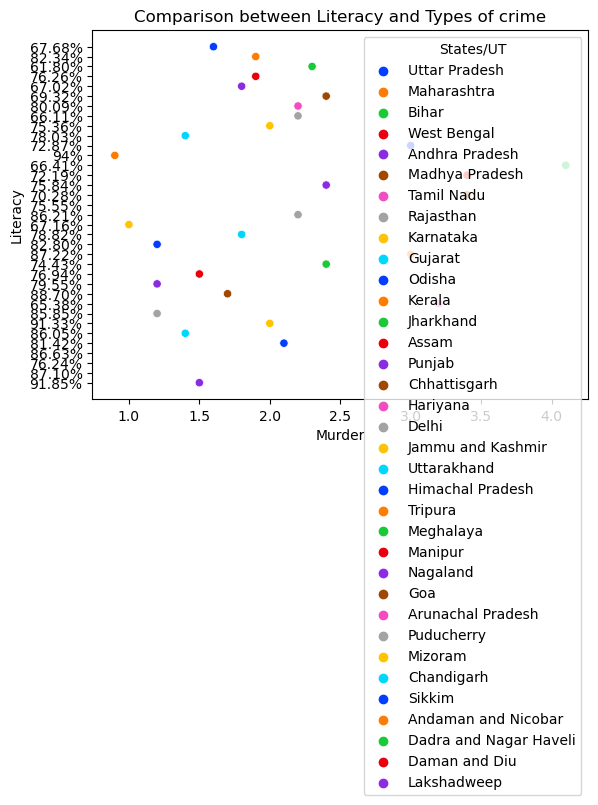

In [19]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.scatterplot(x='Murder', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()


Above scatterplot shows tha comparision between literacy rate and types of crimes in each states. We can see that Uttarpradesh shws the highest crimes in India. Kerala shows the highest literacy rate in India. On x axis murder are show and y axis shows the literacy rate.

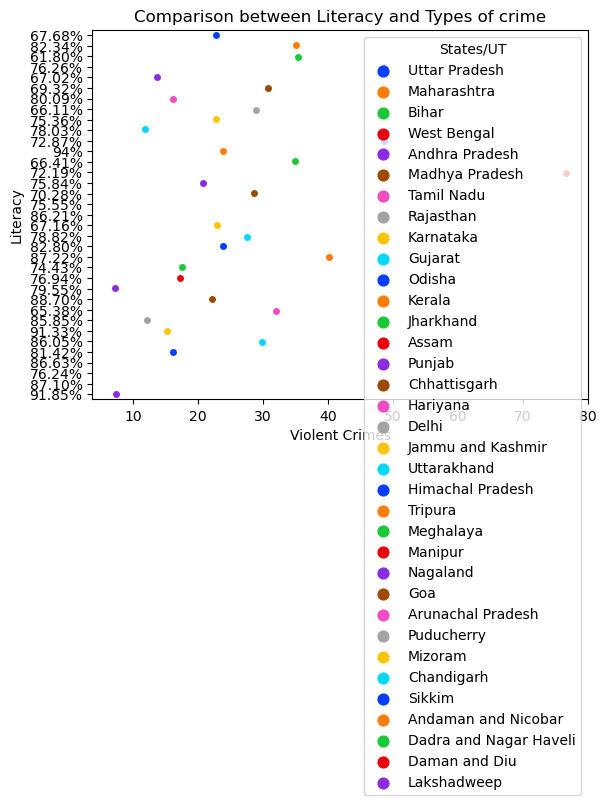

In [20]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Violent Crimes', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

Above stripplot is used to show the literacy rates and types of crimes in India. We can see the same percentage as scatterplot here. Uttar pradesh and Bihar are the states which shows the major crimes in India. Kerala is the state which represent the highest literacy rate in India. This stripplot shows the violent crimes on x axis and literacy rate on y axis.

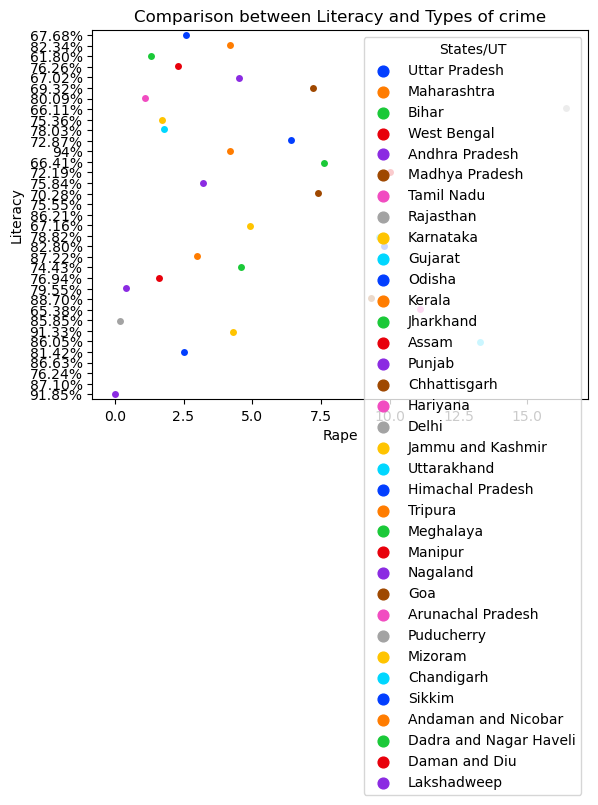

In [21]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Rape', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

In the above stripplot we can see rape on x axis and literacy rate on y axis. Each states and Union territory shows the rape rate and literacy rate through the stripplot. Plots are used to verify easily crimes and literacy in India.

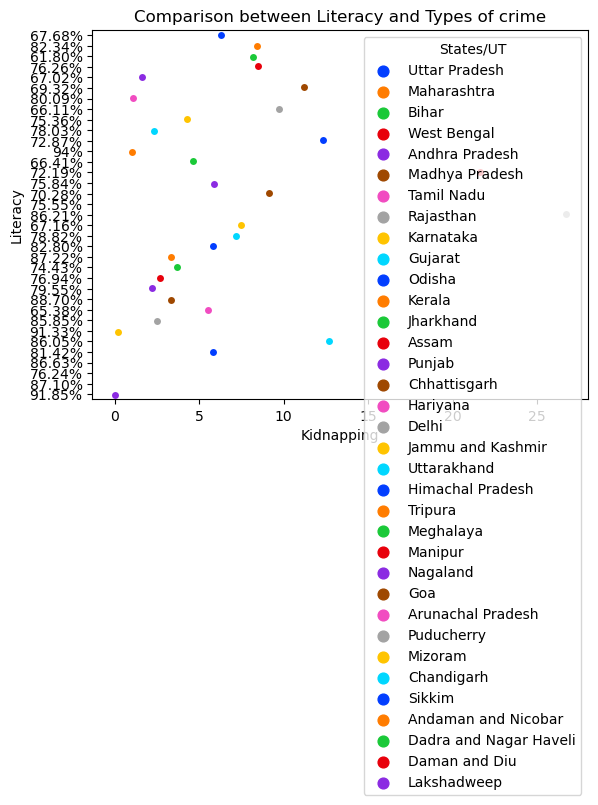

In [22]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Kidnapping', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

In the above stripplot we can see the comparisions between literacy and kidnapping rates in Indian states and Union territory. We can easily verify that major kidnapping rate is found in Uttarpradesh and Bihar through the stripplot. Literacy rate is on y axis on the stripplot and kidnapping is shown on  axis on stripplot. 

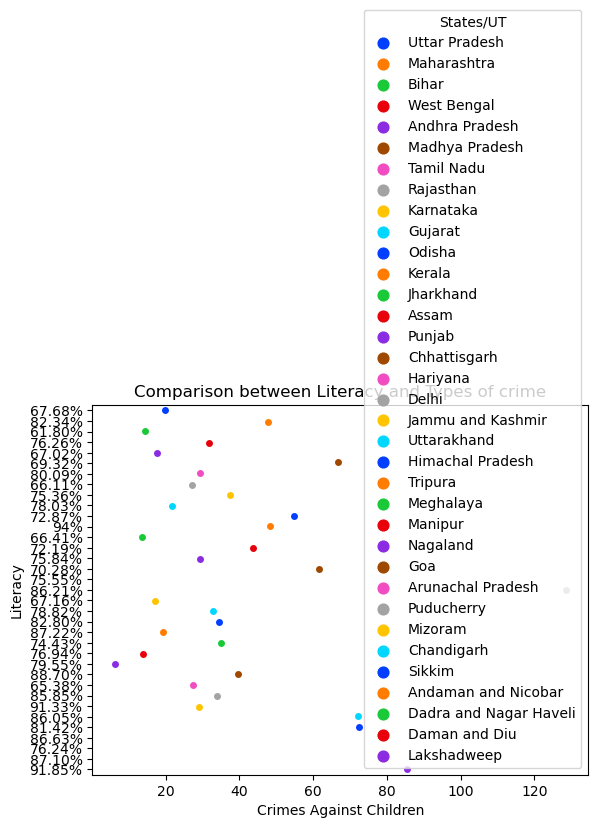

In [23]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Crimes Against Children', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

In the above stripplot we can see the comparisions between literacy and Crimes Against Children rates in Indian states and Union territory. We can easily verify that major Crimes Against Children rate is found in Uttarpradesh and Bihar through the stripplot. Literacy rate is on y axis on the stripplot and Crimes Against Children is shown on  axis on stripplot. 

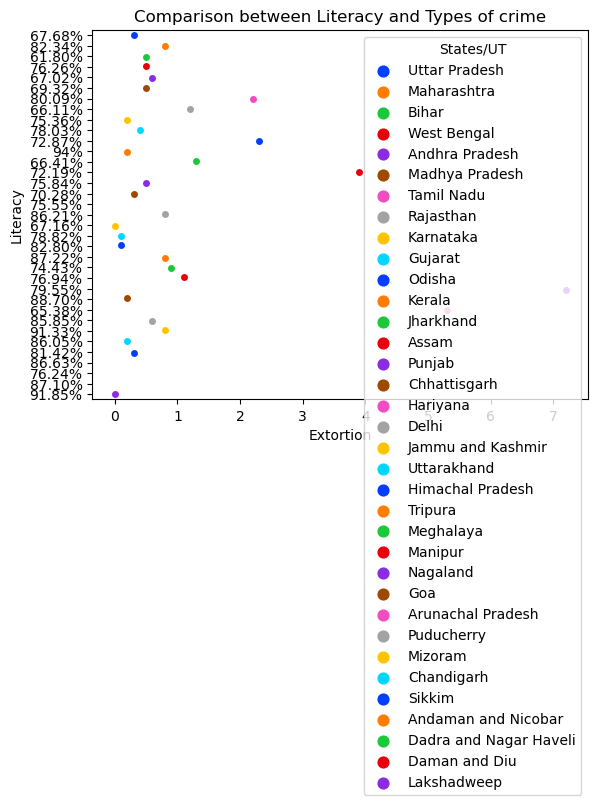

In [24]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Extortion', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

In the above stripplot we can see the comparisions between literacy and Extortion rates in Indian states and Union territory. We can easily verify that major Extortion rate is found in Uttarpradesh and Bihar through the stripplot. Literacy rate is on y axis on the stripplot and Extortion is shown on  axis on stripplot. 

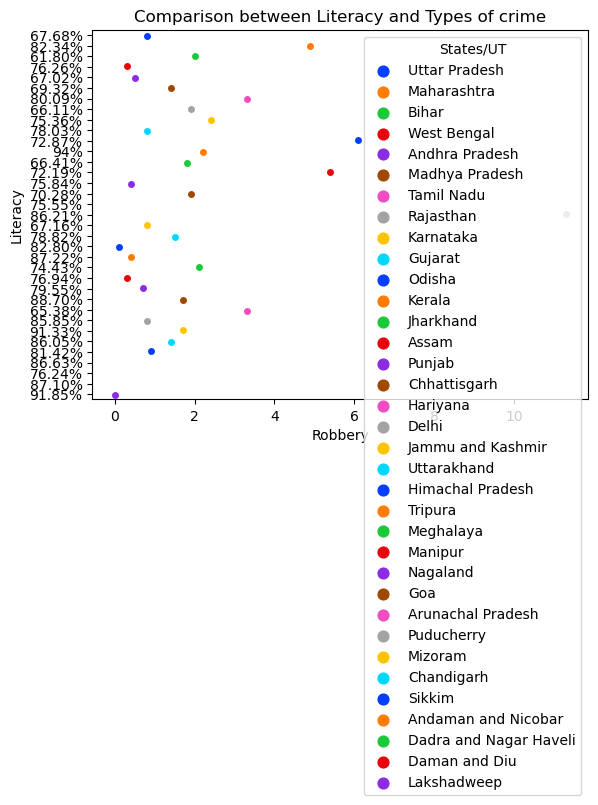

In [25]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Robbery', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

In the above stripplot we can see the comparisions between literacy and Robbery rates in Indian states and Union territory. We can easily verify that major Robbery rate is found in Uttarpradesh and Bihar through the stripplot. Literacy rate is on y axis on the stripplot and Robbery is shown on  axis on stripplot. 

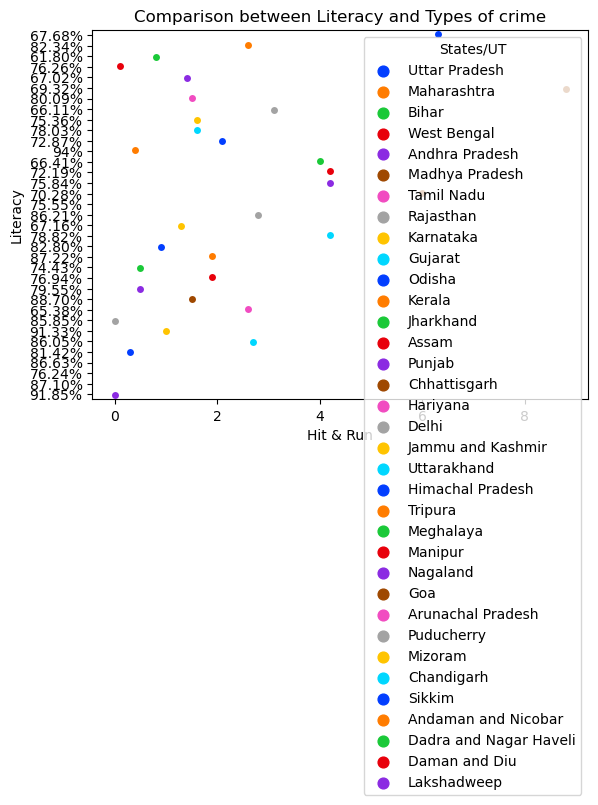

In [26]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Hit & Run', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

In the above stripplot we can see the comparisions between literacy and Hit & run rates in Indian states and Union territory. We can easily verify that major Hit & run rate is found in Uttarpradesh and Bihar through the stripplot. Literacy rate is on y axis on the stripplot and Hit & run is shown on  axis on stripplot. 

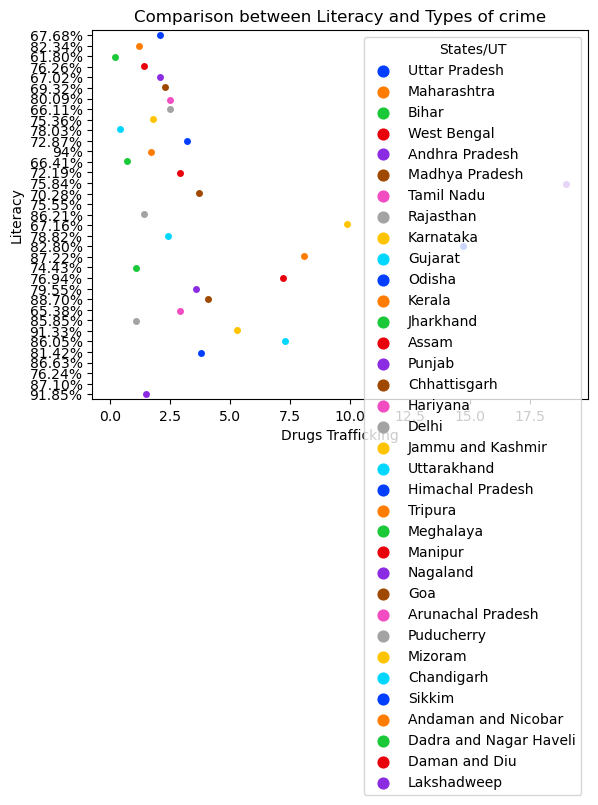

In [27]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Drugs Trafficking', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

In the above stripplot we can see the comparisions between literacy and drug trafficking rates in Indian states and Union territory. We can easily verify that major drug trafficking rate is found in Uttarpradesh and Bihar through the stripplot. Literacy rate is on y axis on the stripplot and Drug traffickking is shown on  axis on stripplot. 

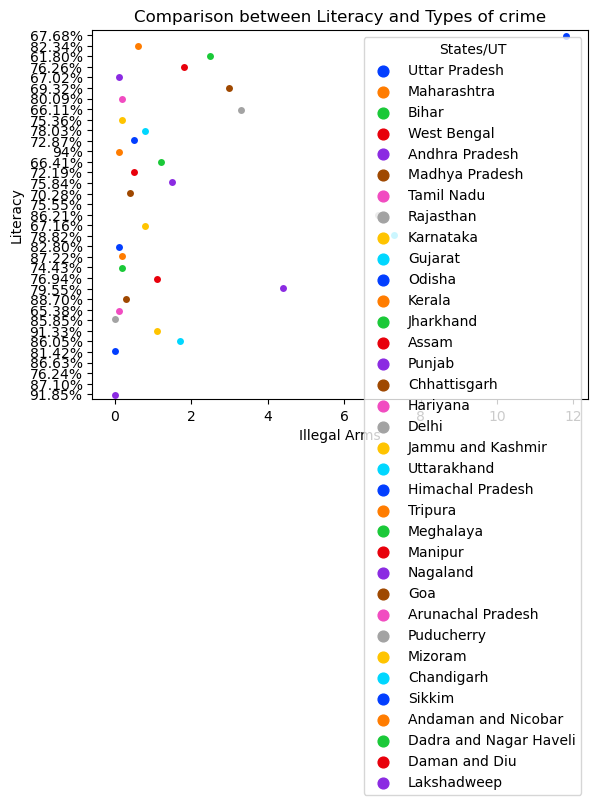

In [28]:
figuresize = (30,28)
plt.title("Comparison between Literacy and Types of crime")
sns.stripplot(x='Illegal Arms', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

In the above stripplot we can see the comparisions between literacy and Illegal arms rates in Indian states and Union territory. We can easily verify that major Illegal arms rate is found in Uttarpradesh and Bihar through the stripplot. Literacy rate is on y axis on the stripplot and Illegal arms is shown on  axis on stripplot. 

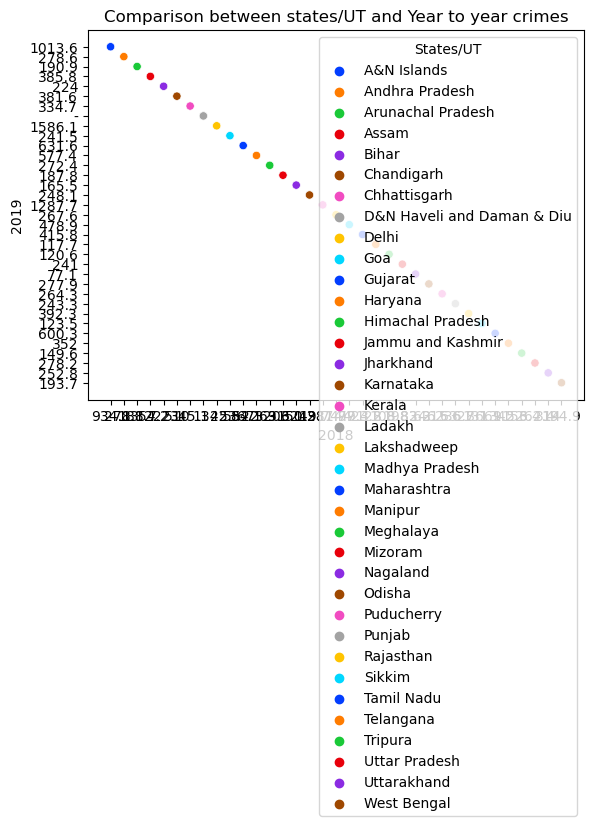

In [29]:
figuresize = (30,28)
plt.title("Comparison between states/UT and Year to year crimes")
sns.scatterplot(x='2018', y='2019', hue='States/UT', data=df_crime_rate, palette='bright')
plt.show()


Above scatterplot has been used to analyse the year on year total crimes as per state. From this sctterplot we can see the increase or decrease in the crime rates as per the years. 

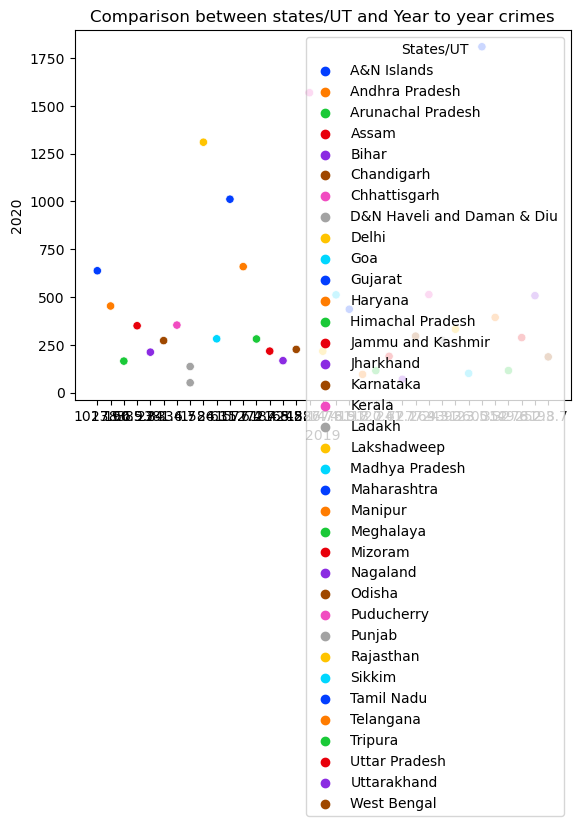

In [30]:
figuresize = (30,28)
plt.title("Comparison between states/UT and Year to year crimes")
sns.scatterplot(x='2019', y='2020', hue='States/UT', data=df_crime_rate, palette='bright')
plt.show()

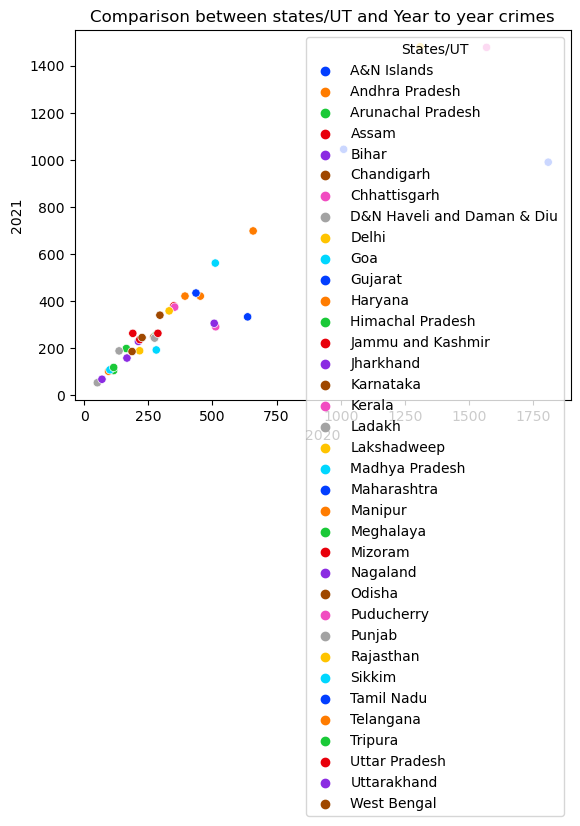

In [31]:
figuresize = (30,28)
plt.title("Comparison between states/UT and Year to year crimes")
sns.scatterplot(x='2020', y='2021', hue='States/UT', data=df_crime_rate, palette='bright')
plt.show()

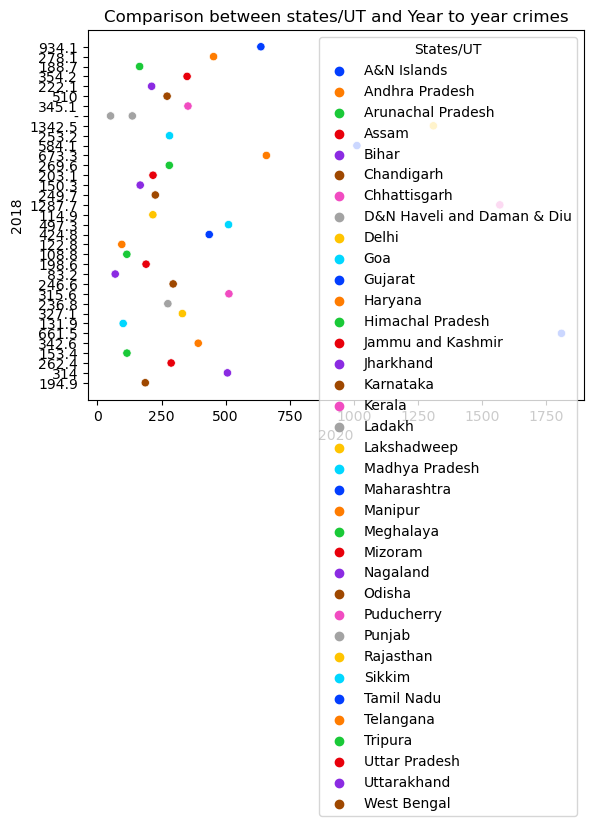

In [32]:
figuresize = (30,28)
plt.title("Comparison between states/UT and Year to year crimes")
sns.scatterplot(x='2020', y='2018', hue='States/UT', data=df_crime_rate, palette='bright')
plt.show()

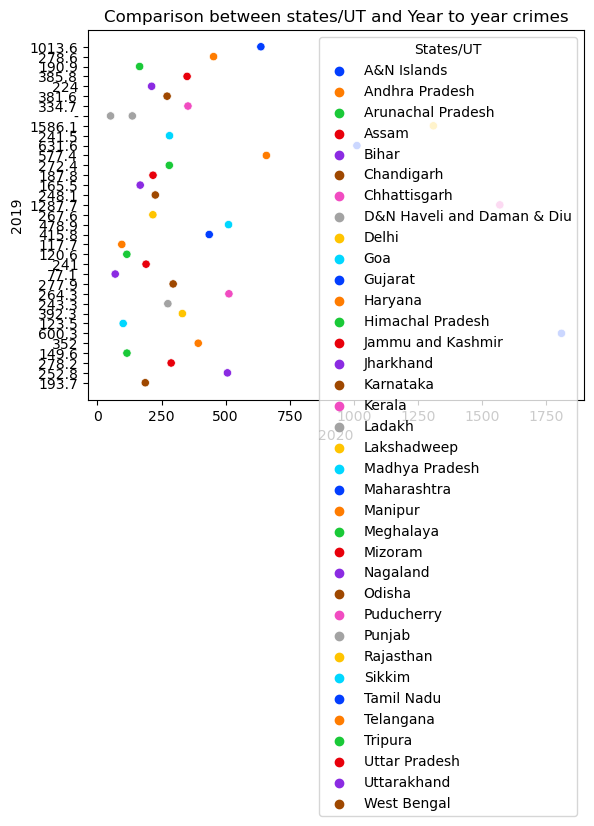

In [33]:
figuresize = (30,28)
plt.title("Comparison between states/UT and Year to year crimes")
sns.scatterplot(x='2020', y='2019', hue='States/UT', data=df_crime_rate, palette='bright')
plt.show()

In the above scatterplot we can verify the 2020 & 2019 crime rates. X axis shows the 2020 crimes and Y axis shows the 2019 crime rates as per the state and UT.

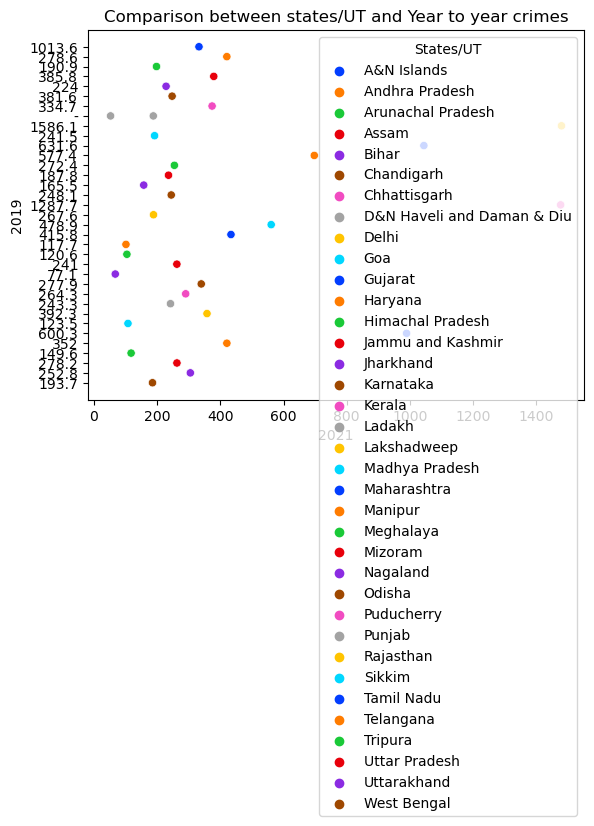

In [34]:
figuresize = (30,28)
plt.title("Comparison between states/UT and Year to year crimes")
sns.scatterplot(x='2021', y='2019', hue='States/UT', data=df_crime_rate, palette='bright')
plt.show()

In above scatterplot we can see comparision between the 2019 & 2021 crime rates in each states & UT. 

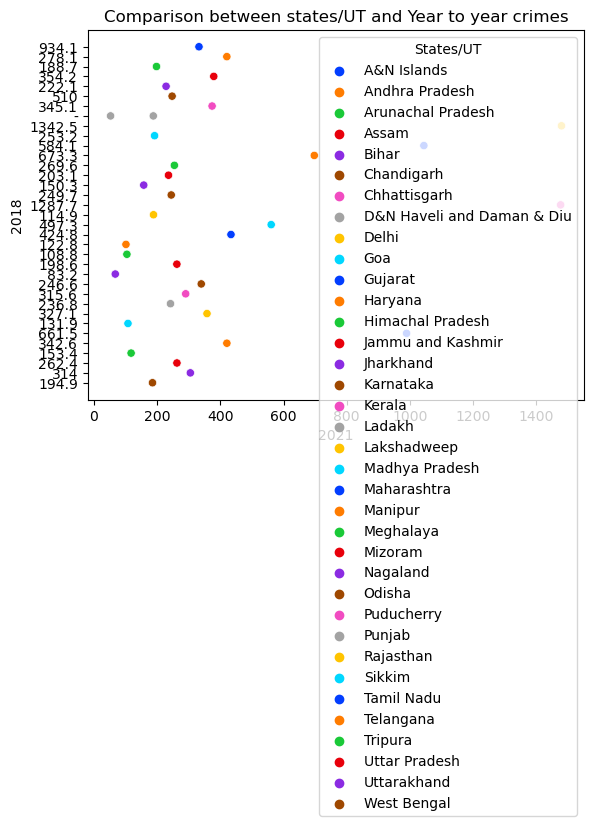

In [35]:
figuresize = (30,28)
plt.title("Comparison between states/UT and Year to year crimes")
sns.scatterplot(x='2021', y='2018', hue='States/UT', data=df_crime_rate, palette='bright')
plt.show()

Above scatterplot shows the crime rates in the year 2018 & 2021. Need to take the corrective action to reduce the crime rates in India.

<BarContainer object of 35 artists>

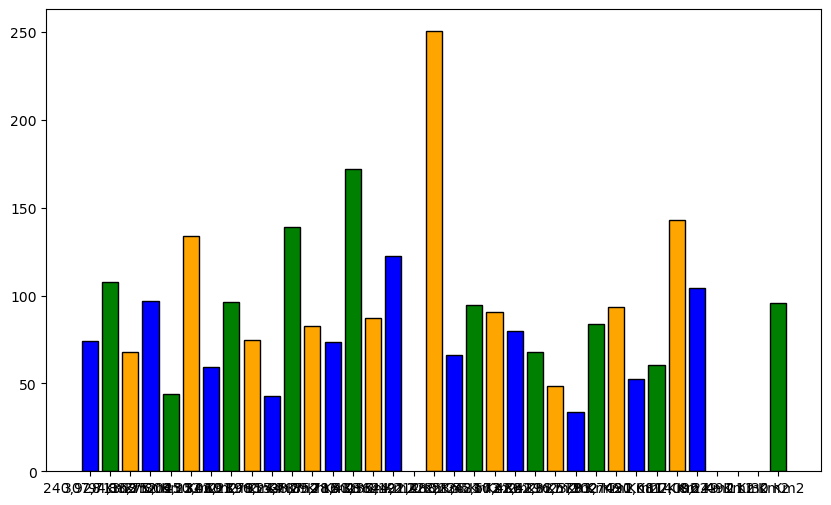

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Area'], merged_data['Total crimes'], color=['blue', 'green', 'orange'], edgecolor='black')

In the above bar we can verify the area and total crimes with different colour. This helps to analyse easily the crime rates and area as per states.

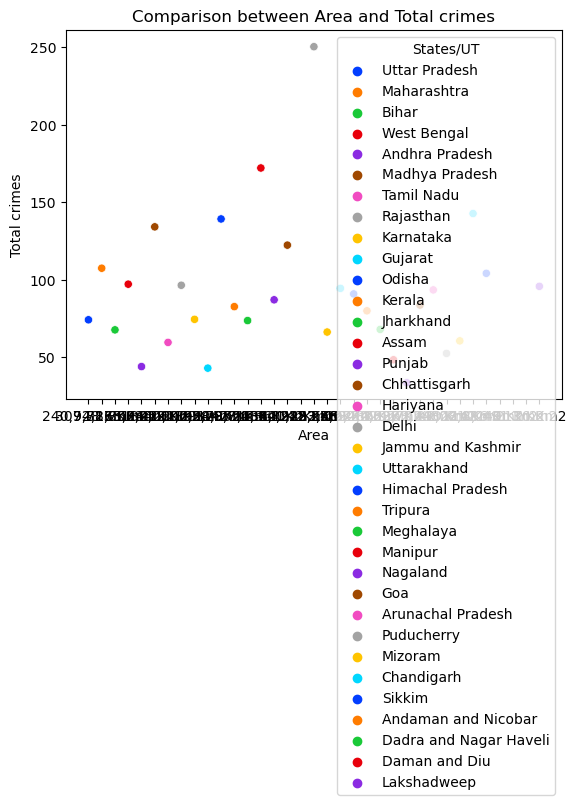

In [45]:
figuresize = (30,28)
plt.title("Comparison between Area and Total crimes")
sns.scatterplot(x='Area', y='Total crimes', hue='States/UT', data=merged_data, palette='bright')
plt.show()

<BarContainer object of 35 artists>

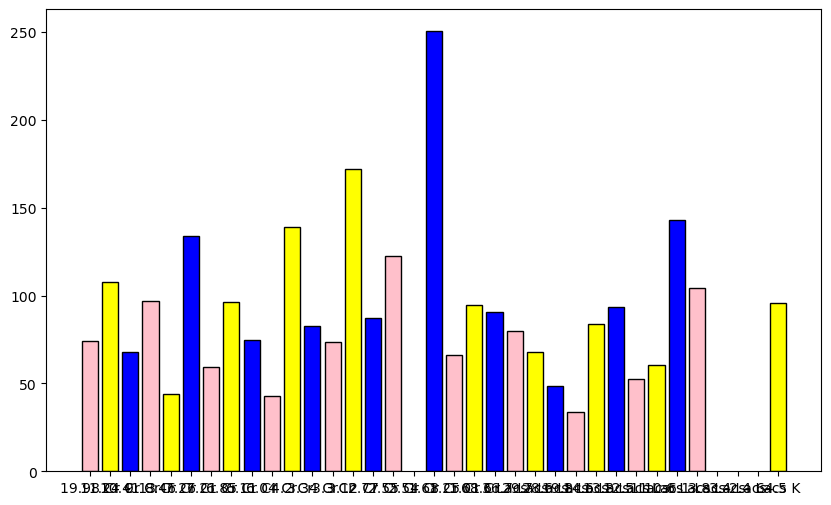

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Population'], merged_data['Total crimes'], color=['pink', 'yellow', 'blue'], edgecolor='black')

Above bar graph shows the populations and total crimes in Indian states and Union territory. 

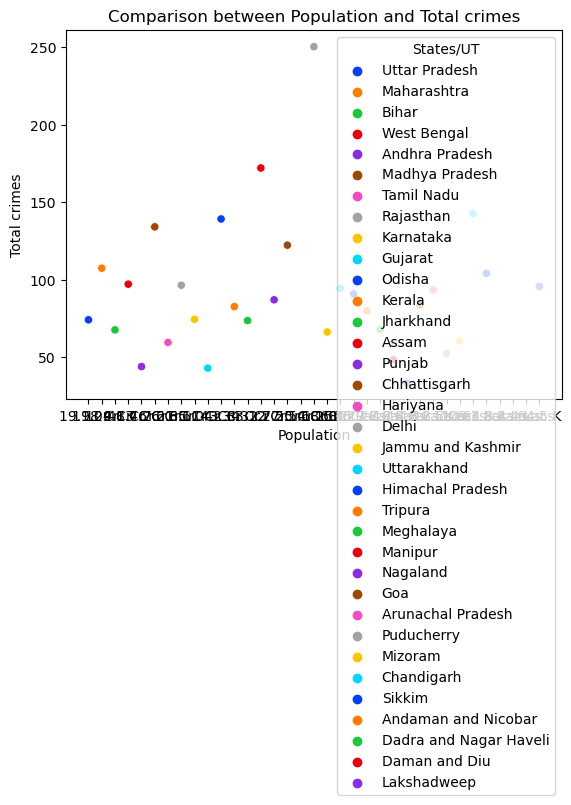

In [49]:
figuresize = (30,28)
plt.title("Comparison between Population and Total crimes")
sns.scatterplot(x='Population', y='Total crimes', hue='States/UT', data=merged_data, palette='bright')
plt.show()

Above scatterplot is used for comparision of total population rates and total crimes in Indian states and Union territory.